In [3]:
#imports
import pandas as pd 
import numpy as np 
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt 
from scipy.stats import norm 

In [6]:
#set Time -----> Constants

years = 15

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365*years)
endDate, startDate

(datetime.datetime(2023, 9, 5, 12, 54, 45, 83027),
 datetime.datetime(2008, 9, 8, 12, 54, 45, 83027))

In [8]:
#List of Tickers
tickers = ['SPY', 'BND', 'GLD', 'QQQ']

#Download adjusted closed price for each ticker

adj_close_df = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start = startDate, end = endDate )
    adj_close_df[ticker] = data['Adj Close']
    
adj_close_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,SPY,BND,GLD,QQQ
Date,,,,
2008-09-08,94.824692,49.743298,78.860001,37.967529
2008-09-09,92.009613,49.833771,76.489998,37.162148
2008-09-10,92.382935,49.833771,74.220001,37.468548
2008-09-11,93.719551,49.801479,73.080002,38.168884
2008-09-12,94.152664,49.639954,75.550003,38.020077
...,...,...,...,...
2023-08-28,442.760010,71.025452,178.130005,366.760010
2023-08-29,449.160004,71.464249,179.869995,374.769989
2023-08-30,451.010010,71.434326,180.320007,376.859985


In [9]:
#Log Returns of each ticker
log_returns = np.log(adj_close_df/adj_close_df.shift(1)) #shift 1 
log_returns = log_returns.dropna()

log_returns

,SPY,BND,GLD,QQQ
Date,,,,
2008-09-09,-0.030137,0.001817,-0.030514,-0.021441
2008-09-10,0.004049,0.000000,-0.030126,0.008211
2008-09-11,0.014365,-0.000648,-0.015479,0.018519
2008-09-12,0.004611,-0.003249,0.033240,-0.003906
2008-09-15,-0.048755,0.007520,0.026257,-0.031578
...,...,...,...,...
2023-08-28,0.006321,0.001827,0.002867,0.007499
2023-08-29,0.014351,0.006159,0.009721,0.021605
2023-08-30,0.004110,-0.000419,0.002499,0.005561


In [10]:
#Create an equally weighted portfolio 

portfolio_value = 1000000
weights = np.array([1/len(tickers)] * len(tickers))

weights

array([0.25, 0.25, 0.25, 0.25])

In [11]:
#Calculate historical portfolio returns 

historical_returns = (log_returns * weights).sum(axis = 1)
historical_returns


Date
2008-09-09   -0.020069
2008-09-10   -0.004466
2008-09-11    0.004189
2008-09-12    0.007674
2008-09-15   -0.011639
                ...   
2023-08-28    0.004629
2023-08-29    0.012959
2023-08-30    0.002938
2023-08-31    0.000385
2023-09-01   -0.000879
Length: 3772, dtype: float64

In [12]:
#Find the x-day historical returns 

days = 5 

range_returns = historical_returns.rolling(window = days).sum()
range_returns = range_returns.dropna()
range_returns

Date
2008-09-15   -0.024311
2008-09-16   -0.003068
2008-09-17    0.003650
2008-09-18    0.003606
2008-09-19    0.026185
                ...   
2023-08-28    0.009607
2023-08-29    0.022871
2023-08-30    0.014344
2023-08-31    0.024273
2023-09-01    0.020031
Length: 3768, dtype: float64

In [17]:
#Specify the confidence interval and calculate VaR using historical method

confidence_interval = 0.95

VaR = -np.percentile(range_returns, 100 - (confidence_interval * 100)) * portfolio_value

#print('{.2f}'.format(VaR))
VaR

24292.79488529979

<function matplotlib.pyplot.show(close=None, block=None)>

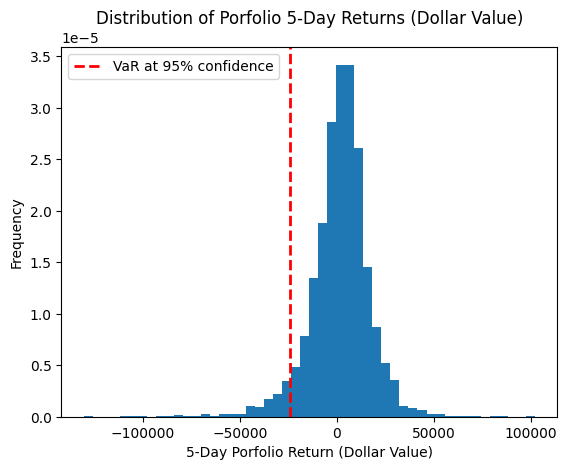

In [21]:
#Plot The Result 

return_window = days 
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value


plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
plt.xlabel(f'{return_window}-Day Porfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Porfolio {return_window}-Day Returns (Dollar Value)')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence')
plt.legend()
plt.show